In [ ]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/car_bus.zip"

--2022-01-08 03:17:39--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/car_bus.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.62.80
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.62.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79013537 (75M) [application/x-zip-compressed]
Saving to: ‘car_bus.zip’

car_bus.zip         100%[===================>]  75.35M  11.7MB/s    in 8.1s    

2022-01-08 03:17:48 (9.34 MB/s) - ‘car_bus.zip’ saved [79013537/79013537]



In [ ]:
!unzip -qo "car_bus.zip"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [ ]:
 
train_datagen = ImageDataGenerator(rescale = 1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1/255)

training_set = train_datagen.flow_from_directory('Training_set/Training_set', target_size = (200, 200), batch_size=16, class_mode='binary')
test_set = test_datagen.flow_from_directory('test/test', target_size=(200, 200), batch_size = 16, class_mode = 'binary')

Found 1486 images belonging to 2 classes.
Found 382 images belonging to 2 classes.


In [ ]:
model = Sequential()


model.add(Conv2D(64, (3, 3), input_shape=(200, 200, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(16, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(10, (3, 3), activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation = 'sigmoid'))

Description: Keras has an useful API which makes us easier to define the layers of our neural network.Here the input_shape is 200,200 which is our image size and 3 represents color channel RGB.If it is a gray scale image the we should specify it as 1.
Conv2D() : Neural networks apply a filter to an input image to create a feature map that summarizes the presence of detected features in the input.In our case there are 32,64,128 and 128 filters or kernels in respective layers and the size of the filters are 3X3 with activation fucntions as relu.
MaxPool2D() :Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.
Flatten() : This method converts the multi-dimensional image data array to 1D array.

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit_generator(training_set, epochs = 20, validation_data=test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
93/93 [==============================] - 145s 2s/step - loss: 0.6228 - accuracy: 0.6447 - val_loss: 0.4994 - val_accuracy: 0.7696
Epoch 2/20
93/93 [==============================] - 142s 2s/step - loss: 0.4844 - accuracy: 0.7961 - val_loss: 0.5196 - val_accuracy: 0.7749
Epoch 3/20
93/93 [==============================] - 141s 2s/step - loss: 0.4397 - accuracy: 0.8062 - val_loss: 0.4139 - val_accuracy: 0.8168
Epoch 4/20
93/93 [==============================] - 140s 1s/step - loss: 0.4029 - accuracy: 0.8271 - val_loss: 0.3717 - val_accuracy: 0.8508
Epoch 5/20
93/93 [==============================] - 139s 1s/step - loss: 0.3797 - accuracy: 0.8365 - val_loss: 0.3617 - val_accuracy: 0.8351
Epoch 6/20
93/93 [==============================] - 140s 2s/step - loss: 0.4065 - accuracy: 0.8271 - val_loss: 0.4859 - val_accuracy: 0.7513
Epoch 7/20
93/93 [==============================] - 137s 1s/step - loss: 0.3781 - accuracy: 0.8412 - val_loss: 0.3536 - val_accuracy: 0.8403
Epoch 8/20
93

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 16)       0

In [ ]:
model.evaluate(test_set)

24/24 [==============================] - 7s 307ms/step - loss: 0.1560 - accuracy: 0.9346


[0.15597373247146606, 0.9345549941062927]

(315, 474, 3)


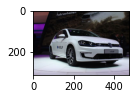

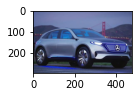

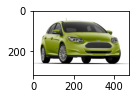

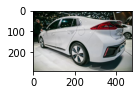

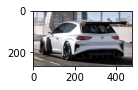

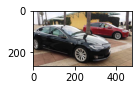

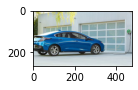

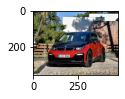

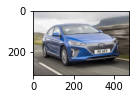

In [ ]:
from matplotlib.image import imread

for i in range(9):
    plt.figure(i)
    plt.subplot(330+1+i)
    img = imread('test/test/electric car/electric__image-10'+str(i)+'.jpeg')
    plt.imshow(img)
print(img.shape)

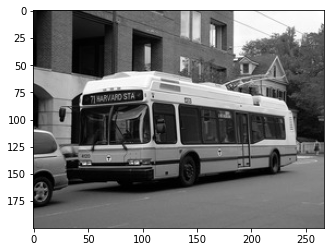

In [ ]:
CATEGORIES = ["electric car", "electric bus"]
import cv2
image_array = cv2.imread('training_set/Training_set/electric bus/821c1f91.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_array, cmap = 'gray')
plt.show()

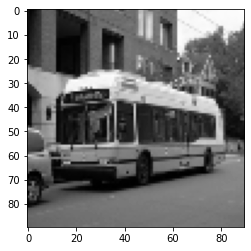

In [ ]:
new_array = cv2.resize(image_array, (90, 90))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
import numpy as np
CATEGORIES = ["electric car", "electric bus"]
def prepare(num=1):
    batch = None
    for i in range(num):
        batch = next(test_set)
    img = batch[0]
    label = batch[1]
    return img[0], label

#model = tf.keras.models.load_model('car_bus_classification.m5')

test_img, _ = prepare(5)
prediction = model.predict(np.expand_dims(test_img, axis=0))
print(prediction)
print(CATEGORIES[int(prediction[0][0])])

[[0.9852215]]
electric car


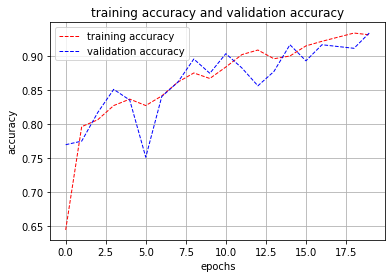

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
plt.plot(accuracy_train, 'r--', label = 'training accuracy', linewidth = 1)
plt.plot(accuracy_val, 'b--', label = 'validation accuracy', linewidth = 1)
plt.title('training accuracy and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

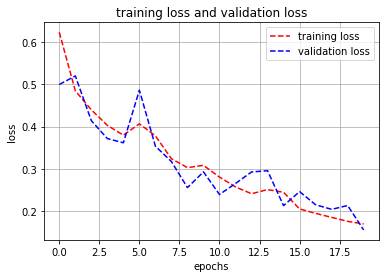

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'r--', label = 'training loss')
plt.plot(loss_val, 'b--', label = 'validation loss')
plt.title('training loss and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.save('car_bus_classification.h5')

In [ ]:
!deepCC car_bus_classification.h5

/bin/bash: deepCC: command not found
